<a href="https://colab.research.google.com/github/aisha123-as/customer-conversion-prediction/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dataset

In [ ]:
import pandas as pd

In [ ]:
cust_df = pd.read_csv('/content/train (3).csv',sep=',')
cust_df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# Exploring Dataset

**Total number of Feature (Independant variable): 10**

1.   age (numeric)
2.   job : type of job
3. marital : marital status
4. educational_qual : education status
5. call_type : contact communication type
6. day: last contact day of the month (numeric)
7. mon: last contact month of year
8. dur: last contact duration, in seconds (numeric)
9. num_calls: number of contacts performed during this campaign and for this client 
10. prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") 

**Total number of Target (Dependant variable): 1**

**Output variable (desired target):**

y - has the client subscribed to the insurance?


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [ ]:
cust_df.duplicated().value_counts()

False    45205
True         6
dtype: int64

Dropping the duplicated 6 row.

In [ ]:
#dropping the duplicate rows
cust_df.drop_duplicates(inplace= True)

In [ ]:
cust_df.duplicated().value_counts()

False    45205
dtype: int64

#EDA - categorical columns

In [ ]:
print(cust_df['age'].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]


In [ ]:
print(cust_df['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


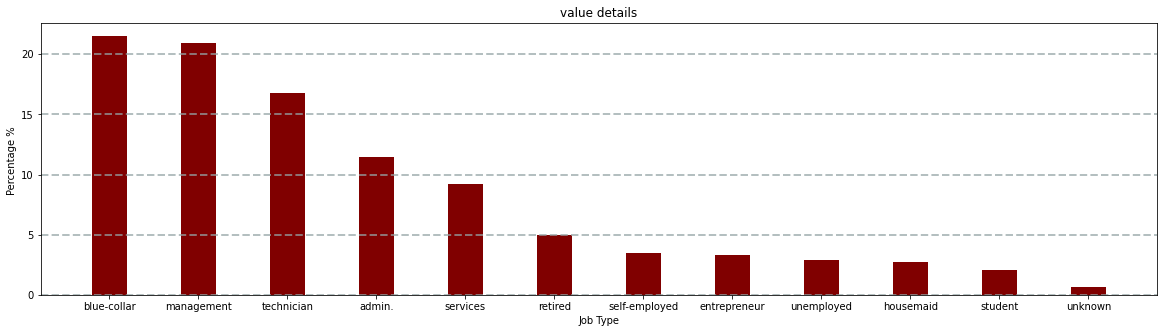

In [ ]:
import matplotlib.pyplot as plt

a = dict (cust_df['job'].value_counts())
b = (cust_df['job'].value_counts().sum())

percent = []
for i in list (cust_df['job'].value_counts()):
  percent.append((int(i)/b)*100)


#graph to view

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(a.keys(), percent, color ='maroon',
        width = 0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("Job Type")
plt.ylabel("Percentage % ")
plt.title("value details")
plt.show()

**Since the missing Unknown value is less then 1% - Dropping the missing rows.**

since the each column has no meaningful order - its nominal cat data - ONE HOT ENCODING

In [ ]:
print(cust_df['marital'].unique())

['married' 'single' 'divorced']


Since its nominal data - converting it into  NUMERICAL datatype by ONE - HOT ENCODING

steps:
1. cat datatype
2. onehot encoding 

In [ ]:
print(cust_df['education_qual'].unique())

['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
print(dict (cust_df['education_qual'].value_counts()))
print('null value percentage',(1857/45211)*100)

{'secondary': 23199, 'tertiary': 13299, 'primary': 6850, 'unknown': 1857}
null value percentage 4.1074074893278185


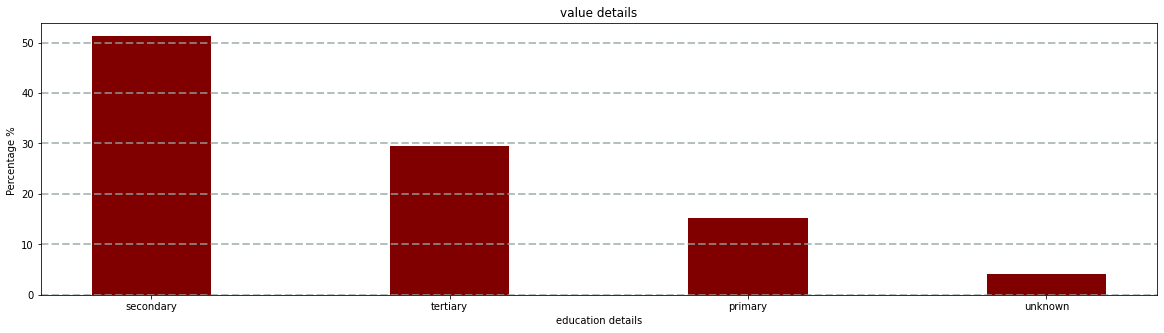

In [ ]:
import matplotlib.pyplot as plt

a = dict (cust_df['education_qual'].value_counts())
b = (cust_df['education_qual'].value_counts().sum())

percent = []
for i in list (cust_df['education_qual'].value_counts()):
  percent.append((int(i)/b)*100)

#graph to view

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(a.keys(), percent, color ='maroon',
        width = 0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("education details")
plt.ylabel("Percentage % ")
plt.title("value details")
plt.show()

1. **There is null column - 4%**

there are two options 
  1. Either to drop the paricular rows 
  2. Entering Dummy data's and appending the new column to differenciate the dummy data

2. **Since this column has meaninful data ( ordinal) - doing ordinal encoding**


In [ ]:
#to get job wise education detail count - by using this data appending the max of each job to qualification
cust_df.groupby(['job', 'education_qual']).size()

job            education_qual
admin.         primary            209
               secondary         4218
               tertiary           572
               unknown            171
blue-collar    primary           3757
               secondary         5370
               tertiary           149
               unknown            454
entrepreneur   primary            183
               secondary          542
               tertiary           686
               unknown             76
housemaid      primary            627
               secondary          395
               tertiary           173
               unknown             45
management     primary            294
               secondary         1121
               tertiary          7800
               unknown            242
retired        primary            795
               secondary          984
               tertiary           366
               unknown            119
self-employed  primary            130
               secon

In [ ]:
print(cust_df['call_type'].unique())

['unknown' 'cellular' 'telephone']


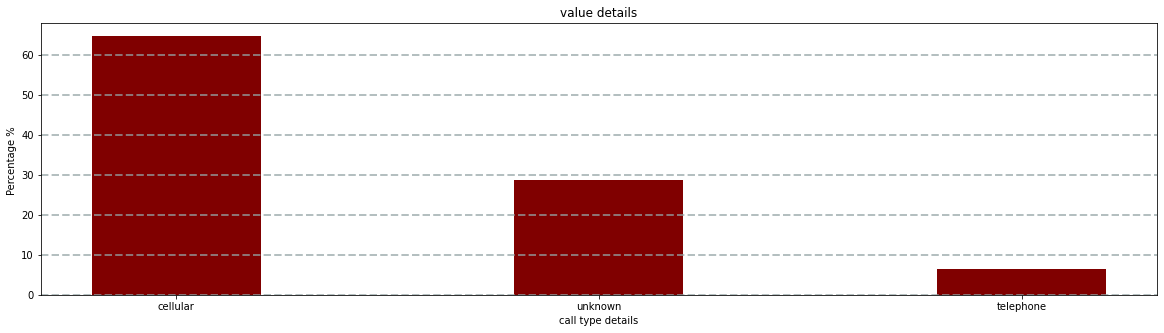

In [ ]:
import matplotlib.pyplot as plt

a = dict (cust_df['call_type'].value_counts())
b = (cust_df['call_type'].value_counts().sum())

percent = []
for i in list (cust_df['call_type'].value_counts()):
  percent.append((int(i)/b)*100)

#graph to view

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(a.keys(), percent, color ='maroon',
        width = 0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("call type details")
plt.ylabel("Percentage % ")
plt.title("value details")
plt.show()

In [ ]:
cust_df.groupby(['call_type', 'y']).size()

call_type  y  
cellular   no     24913
           yes     4369
telephone  no      2516
           yes      390
unknown    no     12487
           yes      530
dtype: int64

This column has null value near to 30% it wont be greate if we drop these much of data - my assumption type of call does not much determine wheather the customer will take insurance or not so dropping the column seems best.


In [ ]:
print(cust_df['mon'].unique())

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


ordinal data - can be arranged using ordinal encoding is used.

In [ ]:
print(cust_df['prev_outcome'].unique())

['unknown' 'failure' 'other' 'success']


In [ ]:
cust_df.groupby(['prev_outcome', 'y']).size()

prev_outcome  y  
failure       no      4283
              yes      618
other         no      1533
              yes      307
success       no       533
              yes      978
unknown       no     33567
              yes     3386
dtype: int64

In [ ]:
print(dict (cust_df['prev_outcome'].value_counts()))
print('null value percentage',(36959/45211)*100)

{'unknown': 36953, 'failure': 4901, 'other': 1840, 'success': 1511}
null value percentage 81.74780473778506


Reason to drop the column:

More than 80% percentage of data is null.
Previous out does not majorly impacts whether or not cust is taking insurance or not.


In [ ]:
print(cust_df['num_calls'].unique())

[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


#Solution For Categorical column

Dropping: Job - unknown value


In [ ]:
cust_df = cust_df[cust_df['job']!='unknown']

In [ ]:
cust_df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [ ]:
one_hot_encoded_data = pd.get_dummies(cust_df, columns = ['job'])
cust_df = (one_hot_encoded_data)

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44917 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                44917 non-null  int64 
 1   marital            44917 non-null  object
 2   education_qual     44917 non-null  object
 3   call_type          44917 non-null  object
 4   day                44917 non-null  int64 
 5   mon                44917 non-null  object
 6   dur                44917 non-null  int64 
 7   num_calls          44917 non-null  int64 
 8   prev_outcome       44917 non-null  object
 9   y                  44917 non-null  object
 10  job_admin.         44917 non-null  uint8 
 11  job_blue-collar    44917 non-null  uint8 
 12  job_entrepreneur   44917 non-null  uint8 
 13  job_housemaid      44917 non-null  uint8 
 14  job_management     44917 non-null  uint8 
 15  job_retired        44917 non-null  uint8 
 16  job_self-employed  44917 non-null  uint8

In [ ]:
cust_df.rename(columns = {'job_admin':'admin',
                          'job_blue-collar':'blue-collar',
                          'job_entrepreneur':'entrepreneur',
                          'job_housemaid':'housemaid',
                          'job_management':'management',
                          'job_retired':'retired',
                          'job_self-employed':'self-employed',
                          'job_services':'services',
                          'job_student':'student',
                          'job_technician':'technician',
                          'job_unemployed':'unemployed'
                          }, inplace = True)
cust_df

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,married,tertiary,unknown,5,may,261,1,unknown,no,...,0,0,0,1,0,0,0,0,0,0
1,44,single,secondary,unknown,5,may,151,1,unknown,no,...,0,0,0,0,0,0,0,0,1,0
2,33,married,secondary,unknown,5,may,76,1,unknown,no,...,0,1,0,0,0,0,0,0,0,0
3,47,married,unknown,unknown,5,may,92,1,unknown,no,...,1,0,0,0,0,0,0,0,0,0
5,35,married,tertiary,unknown,5,may,139,1,unknown,no,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,cellular,17,nov,977,3,unknown,yes,...,0,0,0,0,0,0,0,0,1,0
45207,71,divorced,primary,cellular,17,nov,456,2,unknown,yes,...,0,0,0,0,1,0,0,0,0,0
45208,72,married,secondary,cellular,17,nov,1127,5,success,yes,...,0,0,0,0,1,0,0,0,0,0
45209,57,married,secondary,telephone,17,nov,508,4,unknown,no,...,1,0,0,0,0,0,0,0,0,0


Converting the marital using one hot encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(cust_df, columns = ['marital'])
cust_df = (one_hot_encoded_data)
cust_df.rename(columns = {'marital_divorced':'divorced','marital_married':'married','marital_single':'single'}, inplace = True)
cust_df

,age,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,job_admin.,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,58,tertiary,unknown,5,may,261,1,unknown,no,0,...,1,0,0,0,0,0,0,0,1,0
1,44,secondary,unknown,5,may,151,1,unknown,no,0,...,0,0,0,0,0,1,0,0,0,1
2,33,secondary,unknown,5,may,76,1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
3,47,unknown,unknown,5,may,92,1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
5,35,tertiary,unknown,5,may,139,1,unknown,no,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,cellular,17,nov,977,3,unknown,yes,0,...,0,0,0,0,0,1,0,0,1,0
45207,71,primary,cellular,17,nov,456,2,unknown,yes,0,...,0,1,0,0,0,0,0,1,0,0
45208,72,secondary,cellular,17,nov,1127,5,success,yes,0,...,0,1,0,0,0,0,0,0,1,0
45209,57,secondary,telephone,17,nov,508,4,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0


converting the education qualification using the ordinal encoding
replacing the unknown based on the scope got using following code.

In [ ]:
cust_df1 = pd.read_csv('/content/train (3).csv',sep=',')
#to get job wise education detail count - by using this data appending the max of each job to qualification
cust_df1.groupby(['job', 'education_qual']).size()

job            education_qual
admin.         primary            209
               secondary         4219
               tertiary           572
               unknown            171
blue-collar    primary           3758
               secondary         5371
               tertiary           149
               unknown            454
entrepreneur   primary            183
               secondary          542
               tertiary           686
               unknown             76
housemaid      primary            627
               secondary          395
               tertiary           173
               unknown             45
management     primary            294
               secondary         1121
               tertiary          7801
               unknown            242
retired        primary            795
               secondary          984
               tertiary           366
               unknown            119
self-employed  primary            130
               secon

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'education_qual', 'mapping': {'primary': 1,
                                      'secondary': 2,
                                      'tertiary': 3 ,
                                      'unknown': 0                         
                                      }}]

oe = OrdinalEncoder(mapping=maplist)
cust_df = oe.fit_transform(cust_df)
cust_df

,age,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,job_admin.,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,58,3,unknown,5,may,261,1,unknown,no,0,...,1,0,0,0,0,0,0,0,1,0
1,44,2,unknown,5,may,151,1,unknown,no,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,unknown,5,may,76,1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
3,47,0,unknown,5,may,92,1,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0
5,35,3,unknown,5,may,139,1,unknown,no,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,cellular,17,nov,977,3,unknown,yes,0,...,0,0,0,0,0,1,0,0,1,0
45207,71,1,cellular,17,nov,456,2,unknown,yes,0,...,0,1,0,0,0,0,0,1,0,0
45208,72,2,cellular,17,nov,1127,5,success,yes,0,...,0,1,0,0,0,0,0,0,1,0
45209,57,2,telephone,17,nov,508,4,unknown,no,0,...,0,0,0,0,0,0,0,0,1,0


Converting ordinal encoding - mon

In [ ]:
cust_df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'mon', 'mapping': {'jan': 1,
                                      'feb': 2,
                                      'mar': 3,
                                      'apr': 4,
                                      'may': 5,
                                      'jun': 6,
                                      'jul': 7,
                                      'aug': 8,
                                      'sep': 9,
                                      'oct': 10,
                                      'nov': 11,
                                      'dec': 12
                                      }}]

oe = OrdinalEncoder(mapping=maplist)
cust_df = oe.fit_transform(cust_df)

Dropping the column prev_outcome

In [ ]:
cust_df.drop(['prev_outcome'], axis=1,inplace= True)

In [ ]:
cust_df

,age,education_qual,call_type,day,mon,dur,num_calls,y,job_admin.,blue-collar,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,58,3,unknown,5,5,261,1,no,0,0,...,1,0,0,0,0,0,0,0,1,0
1,44,2,unknown,5,5,151,1,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,unknown,5,5,76,1,no,0,0,...,0,0,0,0,0,0,0,0,1,0
3,47,0,unknown,5,5,92,1,no,0,1,...,0,0,0,0,0,0,0,0,1,0
5,35,3,unknown,5,5,139,1,no,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,cellular,17,11,977,3,yes,0,0,...,0,0,0,0,0,1,0,0,1,0
45207,71,1,cellular,17,11,456,2,yes,0,0,...,0,1,0,0,0,0,0,1,0,0
45208,72,2,cellular,17,11,1127,5,yes,0,0,...,0,1,0,0,0,0,0,0,1,0
45209,57,2,telephone,17,11,508,4,no,0,1,...,0,0,0,0,0,0,0,0,1,0


Dropping the column call type 

In [ ]:
cust_df.drop(['call_type'], axis=1,inplace= True)

In [ ]:
cust_df

,age,education_qual,day,mon,dur,num_calls,y,job_admin.,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
0,58,3,5,5,261,1,no,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,44,2,5,5,151,1,no,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,5,76,1,no,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,47,0,5,5,92,1,no,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,35,3,5,5,139,1,no,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,yes,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45207,71,1,17,11,456,2,yes,0,0,0,...,0,1,0,0,0,0,0,1,0,0
45208,72,2,17,11,1127,5,yes,0,0,0,...,0,1,0,0,0,0,0,0,1,0
45209,57,2,17,11,508,4,no,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Shifting the Y column to end to observe the result easily.

In [ ]:
temp_y = list(cust_df['y'])
temp_y

cust_df['Outcome'] = temp_y

In [ ]:
cust_df.drop(['y'], axis=1,inplace= True)
cust_df

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,no
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,no
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,no
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,no
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,yes
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,yes
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,yes
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,no


In [ ]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'Outcome', 'mapping': {'yes': 1,
                                      'no': 0                                   
                                      }}]

oe = OrdinalEncoder(mapping=maplist)
cust_df = oe.fit_transform(cust_df)

In [ ]:
cust_df

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


**predicting the education qual by using algo**

Creating a new model to predict the unknown

1. creating df with unknown as value
2. creating the another df as train data without unknown as value.
3. Create “x_train” & “y_train” from train data
4. Build the linear regression model
5. Create the x_test from test data
6. Apply the model on x_test of test data to make predictions. here, we have created a new variable ‘y_pred’.
7. Finally, we replace the missing values with predicted values.

In [ ]:
cust_df

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test_data = cust_df[cust_df['education_qual']==0]

In [ ]:
test_data

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13,58,0,5,5,71,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
16,45,0,5,5,98,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,60,0,5,5,22,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44,58,0,5,5,616,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45098,44,0,25,10,189,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45109,78,0,25,10,211,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
45129,46,0,27,10,171,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45150,65,0,8,11,354,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_data = cust_df[cust_df['education_qual']!=0]
train_data

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,28,3,5,5,217,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train = train_data.drop('education_qual', axis = 1)
y_train = train_data['education_qual']

In [ ]:
x_train

,age,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,5,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,44,5,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,33,5,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,35,5,5,139,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6,28,5,5,217,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,11,977,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
45207,71,17,11,456,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
45208,72,17,11,1127,5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
45209,57,17,11,508,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
(y_train)

0        3
1        2
2        2
5        3
6        3
        ..
45206    3
45207    1
45208    2
45209    2
45210    2
Name: education_qual, Length: 43187, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test = test_data.drop('education_qual', axis = 1)

In [ ]:
y_pred = Lr.predict(x_test)
y_pred

array([1.52464696, 2.04614221, 2.06632575, ..., 2.25770765, 2.59169388,
       2.16684387])

In [ ]:
test_data['y_predicted'] = y_pred
temp_pred = test_data['y_predicted'].astype(int)

<ipython-input-129-87e5fd243e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_predicted'] = y_pred


In [ ]:
test_data.drop(['y_predicted'], axis=1,inplace= True)
test_data['y_predicted'] = list(temp_pred)
test_data

<ipython-input-130-d96e6771a71f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['y_predicted'], axis=1,inplace= True)
<ipython-input-130-d96e6771a71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_predicted'] = list(temp_pred)


,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome,y_predicted
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
13,58,0,5,5,71,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
16,45,0,5,5,98,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2
42,60,0,5,5,22,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
44,58,0,5,5,616,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45098,44,0,25,10,189,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
45109,78,0,25,10,211,2,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
45129,46,0,27,10,171,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,2
45150,65,0,8,11,354,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [ ]:
cust_df

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,5,5,92,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Splitting the DF into 2 
1. education as 0 - which is unknown and dropping the column and replace the newly calculated value
2. education other than 0

3. Merging the two DF

In [ ]:
cust_df_temp1 = cust_df[cust_df['education_qual'] ==0]
cust_df_temp1.drop('education_qual', axis=1, inplace = True)
cust_df_temp1['education_qual'] = list(temp_pred)
cust_df_temp1

<ipython-input-132-3fa3dce2b7a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_temp1.drop('education_qual', axis=1, inplace = True)
<ipython-input-132-3fa3dce2b7a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_temp1['education_qual'] = list(temp_pred)


,age,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,management,...,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome,education_qual
3,47,5,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
13,58,5,5,71,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
16,45,5,5,98,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
42,60,5,5,22,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
44,58,5,5,616,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45098,44,25,10,189,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
45109,78,25,10,211,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,2
45129,46,27,10,171,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,2
45150,65,8,11,354,3,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2


In [ ]:
cust_df_temp2 = cust_df[cust_df['education_qual'] !=0]
cust_df_temp2

,age,education_qual,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,...,retired,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome
0,58,3,5,5,261,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,44,2,5,5,151,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,33,2,5,5,76,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,35,3,5,5,139,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,28,3,5,5,217,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,17,11,977,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
45207,71,1,17,11,456,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
45208,72,2,17,11,1127,5,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
45209,57,2,17,11,508,4,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cust_df_Final= pd.concat([cust_df_temp1, cust_df_temp2], ignore_index=True)
cust_df_Final

,age,day,mon,dur,num_calls,job_admin.,blue-collar,entrepreneur,housemaid,management,...,self-employed,services,student,technician,unemployed,divorced,married,single,Outcome,education_qual
0,47,5,5,92,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,58,5,5,71,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2
2,45,5,5,98,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,60,5,5,22,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,58,5,5,616,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44912,51,17,11,977,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,3
44913,71,17,11,456,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
44914,72,17,11,1127,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2
44915,57,17,11,508,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2


After updating all the column to cross verify if we have any duplicate rows, dropping incase if we find any.

In [ ]:
cust_df_Final.duplicated().value_counts()

False    44908
True         9
dtype: int64

In [ ]:
#dropping the duplicate rows
cust_df_Final.drop_duplicates(inplace= True)

In [ ]:
cust_df_Final.duplicated().value_counts()

False    44908
dtype: int64

#Handling Imbalance Dataset

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
cust_df_Final['Outcome'].value_counts()
# this causes the auroc score - low 58% - converting the imbalance dataset to balanced dataset.

0    39653
1     5255
Name: Outcome, dtype: int64

Using SMOTE to balance data.

In [ ]:
X = cust_df_Final.drop('Outcome',axis='columns')
y = cust_df_Final['Outcome']

In [ ]:
y.value_counts() # y - before fit - imbalance

0    39653
1     5255
Name: Outcome, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts() #using smote balanced data

0    39653
1    39653
Name: Outcome, dtype: int64

# Applying ML Classsification Algorithms 
**Logistic Regression**

Splitting the Final DataFrame as 2 train and test


In [ ]:
cust_df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44908 entries, 0 to 44916
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             44908 non-null  int64
 1   day             44908 non-null  int64
 2   mon             44908 non-null  int64
 3   dur             44908 non-null  int64
 4   num_calls       44908 non-null  int64
 5   job_admin.      44908 non-null  uint8
 6   blue-collar     44908 non-null  uint8
 7   entrepreneur    44908 non-null  uint8
 8   housemaid       44908 non-null  uint8
 9   management      44908 non-null  uint8
 10  retired         44908 non-null  uint8
 11  self-employed   44908 non-null  uint8
 12  services        44908 non-null  uint8
 13  student         44908 non-null  uint8
 14  technician      44908 non-null  uint8
 15  unemployed      44908 non-null  uint8
 16  divorced        44908 non-null  uint8
 17  married         44908 non-null  uint8
 18  single          44908 non-

In [ ]:
# fixing the features and targets
# x - feature and feature is 2D here
# y - Target and in 1D
X = cust_df_Final[["age","day","mon",'dur','num_calls','job_admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','divorced','married','single','education_qual']].values
y = cust_df_Final['Outcome'].values
print(y)
print(X[0])

[0 0 0 ... 1 0 0]
[47  5  5 92  1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1]


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random state -42 -> so that each time it takes same set of data
#test size is 30% the standard percentage for testing and training the std is 70%

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=2)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=2)

In [ ]:
print(classifier.intercept_) #lin_reg is trained dataset
print(classifier.coef_)

[-2.45768771]
[[ 0.14928952 -0.05895822  0.08865813  0.93682891 -0.44091994  0.06750829
  -0.14489808 -0.09386506 -0.03635947  0.02691125  0.17412117 -0.01975807
  -0.07014227  0.18812933 -0.00102009  0.05315171 -0.04650725 -0.08310511
   0.12345815  0.23172536]]


In [ ]:
score = classifier.score(X_test,y_test)
print(score)
print(score * 100,"%")

0.8889631114080012
88.89631114080012 %


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set using the trained model
y_pred = model.predict(X_test)

# Calculate error metrics using sklearn
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.178027888878786
Mean Squared Error: 0.08624610272062465
Root Mean Squared Error: 0.2936768678677717


In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Auroc score
from sklearn import metrics
Score = metrics.roc_auc_score(y_test,y_pred)
Score

0.5002533569799847

Accuracy is 89% but auroc is low due to imbalance dataset fixing the error refer the above module - Imbalance dataset

**After balancing the data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    31722
0    31722
Name: Outcome, dtype: int64

In [ ]:
# Number of classes in test Data
y_test.value_counts()

0    7931
1    7931
Name: Outcome, dtype: int64

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier_l= LogisticRegression(random_state=42)  
classifier_l.fit(X_train, y_train)  

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
print(classifier.intercept_) 
print(classifier.coef_)

[-2.45768771]
[[ 0.14928952 -0.05895822  0.08865813  0.93682891 -0.44091994  0.06750829
  -0.14489808 -0.09386506 -0.03635947  0.02691125  0.17412117 -0.01975807
  -0.07014227  0.18812933 -0.00102009  0.05315171 -0.04650725 -0.08310511
   0.12345815  0.23172536]]


In [ ]:
score = classifier_l.score(X_test,y_test)
print(score)
print(score * 100,"%")

0.8603580885134283
86.03580885134284 %


In [ ]:
#Predicting the test set result  
LR_y_pred= classifier_l.predict(X_test)  

In [ ]:
LR_y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn import metrics
import numpy as np
#only target value should be passed that y we are using ytest

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_y_pred)))

Mean Absolute Error: 0.13964191148657168
Mean Squared Error: 0.13964191148657168
Root Mean Squared Error: 0.37368691639736556


In [ ]:
#Auroc score

from sklearn import metrics
LR_Score = metrics.roc_auc_score(y_test,LR_y_pred)
LR_Score

0.8603580885134283

After balancing the Dataset the auroc score has increased !!!

#2. KNN ALGORITHM

Already in the above section data split is done.
So directly appying the algorithm.

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
#Predicting the test set result 

y_pred= knn.predict(X_test)  

In [ ]:
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Test set Accuracy:  0.8763081578615559


In [ ]:
#Auroc score

from sklearn import metrics
knn_Score = metrics.roc_auc_score(y_test,y_pred)
knn_Score

0.8763081578615559

#3.Desicion Tree

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)  
decision_tree.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#Predicting the test set result  
DT_y_pred= decision_tree.predict(X_test) 

In [ ]:
#Auroc score

from sklearn import metrics
DT_Score = metrics.roc_auc_score(y_test,DT_y_pred)
DT_Score

0.9085865590719959

#4. Random Forest

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
RF = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RF.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
RF_y_pred= RF.predict(X_test) 

In [ ]:
#Auroc score

from sklearn import metrics
RF_Score = metrics.roc_auc_score(y_test,RF_y_pred)
RF_Score

0.933741016265288

#5. XGboost

In [ ]:
import xgboost as xgb
XG = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [ ]:
XG.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#Predicting the test set result  
XG_y_pred= XG.predict(X_test) 

In [ ]:
#Auroc score

from sklearn import metrics
XG_Score = metrics.roc_auc_score(y_test,XG_y_pred)
XG_Score

0.9758153084984139

# 6. Naive Bayes

In [ ]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
naive_bayes = GaussianNB()  
naive_bayes.fit(X_train, y_train)  

GaussianNB()

In [ ]:
#Predicting the test set result  
NB_y_pred= naive_bayes.predict(X_test) 

In [ ]:
#Auroc score

from sklearn import metrics
NB_Score = metrics.roc_auc_score(y_test,NB_y_pred)
NB_Score

0.8102383053839364

#ORDINAL ENCODING



**Reason to do Encoding(converting the categorical data to numerical data):**

*Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.*


**3 - Types:**

**1. Ordinal Encoding :**

In ordinal encoding, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

**When not to use:**

Ordinal encoder also should not be used if your data has *no meaningful order*.

**When to Use:**

* When working with *ordinal data*(which has meaningful order can compare and arrange) 

* When working with any data related to *ranking something with non-numerical categories*, ordinal encoder is the way to go.

***WARNING: If you do not use mapping=, the encoder will not know how to order your values and the encoder will pick random integers for you, and your data will most likely not be in order.***

In [ ]:
from category_encoders import OrdinalEncoder 

maplist = [{'col': 'satisfaction_rating', 'mapping': {'Very Dissatisfied': 0, 'Dissatisfied': 1,'Neutral': 2, 'Satisfied': 3, 'Very Satisfied': 4}}]

# define ordinal encoding
oe = OrdinalEncoder(mapping=maplist)
# fitting into ordinal encoding

#ONE-HOT ENCODING

when to use: when there is no meaningful relation in the feature if the feature is nominal.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# initializing values
data = {'Name':['Tom', 'Jack', 'Nick', 'John',
                'Tom', 'Jack', 'Nick', 'John',
                'Tom', 'Jack', 'Nick', 'John',],
        'Time':[20, 21, 19, 18,
                20, 100, 19, 18,
                21, 22, 21, 20]
}
#creating dataframe
df = pd.DataFrame(data)
#showing head
df.head()

,Name,Time
0,Tom,20
1,Jack,21
2,Nick,19
3,John,18
4,Tom,20


In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on columns 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Name']]).toarray())
#merge one-hot encoded columns back with original DataFrame
df2 = df.join(encoder_df)
#drop columns with strings
df2.drop('Name', axis=1, inplace=True)
#showing new head
df2.head()

,Time,0,1,2,3
0,20,0.0,0.0,0.0,1.0
1,21,1.0,0.0,0.0,0.0
2,19,0.0,0.0,1.0,0.0
3,18,0.0,1.0,0.0,0.0
4,20,0.0,0.0,0.0,1.0


So, the Encoder has created 4 new columns, all filled with 0s and 1, with respect to the values of the other column (the column “Time”). You may understand what can a data frame become if you have tens (or more) independent values that become new columns.

Now, there is a problem with that method: as you can see, the new columns are numbers…how do you understand which number represents your old string value? To be more specific: which of these numbers are Tom and which is Nick? We have to rename the columns, in some way.

I’ve searched for some solutions to rename the columns during this process, so that we don’t lose the relations between the new column and the old one (which is the column Nick?), but I found just one and I wasn’t happy with that, so I won’t show it here.

“get_dummy” in Pandas
There is a much more simpler way to perform one-hot encoding and it can be done directly in pandas. Consider the data frame, df, as we created it earlier. To encode it we can simply write the following line of code:



In [ ]:
#one-hot encoding
df3 = pd.get_dummies(df, dtype=int)
#showing new head
df3.head()

,Time,Name_Jack,Name_John,Name_Nick,Name_Tom
0,20,0,0,0,1
1,21,1,0,0,0
2,19,0,0,1,0
3,18,0,1,0,0
4,20,0,0,0,1


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# create a sample input data with 3 features (columns)
data = np.array([
    [0, 'red', 1],
    [1, 'blue', 2],
    [2, 'green', 3],
    [0, 'red', 2],
    [1, 'green', 1]
])

# create a dataframe with column names
df = pd.DataFrame(data, columns=['feature1', 'feature2', 'feature3'])

# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)

# transform data
onehot = encoder.fit_transform(df)

print(onehot)


[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 0.]]


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd

# create a sample DataFrame
data = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Remarks': ['Good', 'Poor', 'Fair', 'Excellent', 'Good'],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female']
})

# one-hot encode the 'Remarks' column
remarks_encoded = pd.get_dummies(data['Remarks'], prefix='Remarks')

# one-hot encode the 'Gender' column
gender_encoded = pd.get_dummies(data['Gender'], prefix='Gender')

# concatenate the encoded columns with the original DataFrame
one_hot_encoded_data = pd.concat([data['ID'], remarks_encoded, gender_encoded], axis=1)

print(one_hot_encoded_data)


   ID  Remarks_Excellent  Remarks_Fair  Remarks_Good  Remarks_Poor  \
0   1                  0             0             1             0   
1   2                  0             0             0             1   
2   3                  0             1             0             0   
3   4                  1             0             0             0   
4   5                  0             0             1             0   

   Gender_Female  Gender_Male  
0              0            1  
1              1            0  
2              0            1  
3              0            1  
4              1            0  


#**Finding the correlation:**

https://towardsdatascience.com/how-to-perform-feature-selection-in-a-data-science-project-591ba96f86eb


<Axes: >

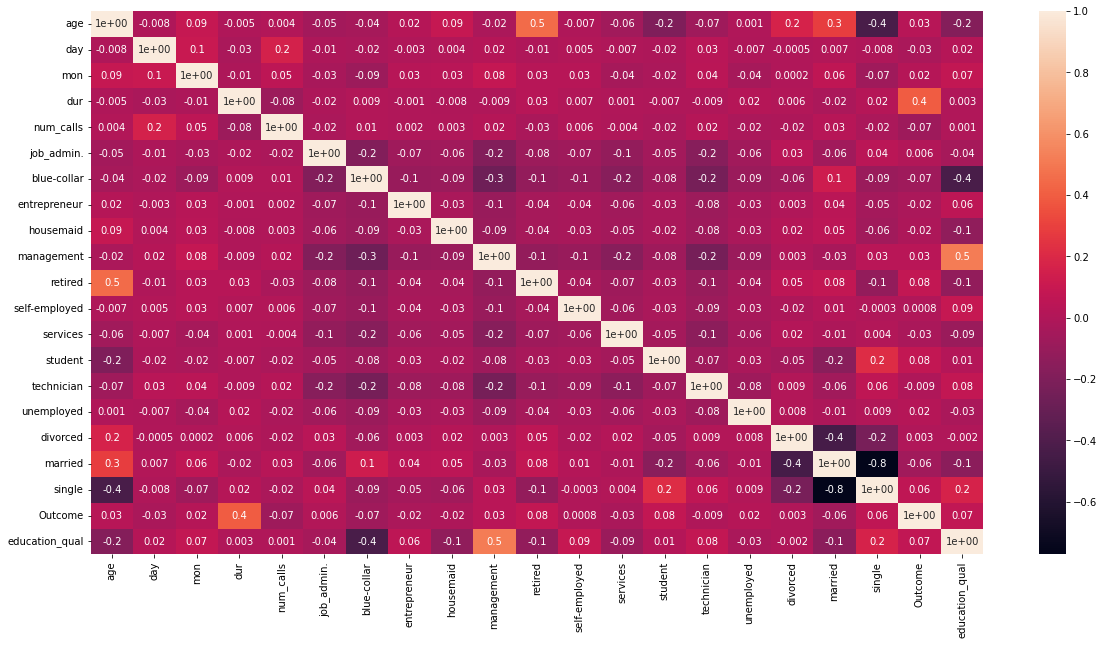

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#figure size
plt.figure(figsize=(20, 10))
#heat map for correlation coefficient
sns.heatmap(cust_df_Final.corr(), annot=True, fmt="0.1")